In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
import importlib

sys.path.append(os.path.join(os.getcwd(), 'NeuralNetworks'))
import Fully_connected_network as fc
importlib.reload(fc)

<module 'Fully_connected_network' from '/home/lucas/Desktop/PFE/MyCode/NeuralNetworks/Fully_connected_network.py'>

In [14]:
def u_true(x):
    term1 = np.sin(2*x + 1)
    term2 = 0.2*np.exp(1.3*x)
    return term1 + term2

In [84]:
class MSELoss(torch.nn.Module):
    def __init__(self):
        super(MSELoss, self).__init__()
        self.mse = torch.nn.MSELoss()

    def forward(self, u_pred, u_true):
        self.loss = self.mse(u_pred, u_true)
        return self.loss

In [98]:
x_np = np.linspace(-1, 1, 300)
x_torch = torch.FloatTensor(x_np).reshape(300, 1)
u_exact = torch.FloatTensor(u_true(x_np)).reshape(300, 1)

x_torch.requires_grad = True
u_exact.requires_grad = True

fc_model = fc.FullyConnectedNetwork(1, 30)
criterion = MSELoss()
model_optimizer_adam = torch.optim.Adam(fc_model.parameters(), lr=1e-3)
model_optimizer_lbfgs = torch.optim.LBFGS(fc_model.parameters(), lr=0.1)
n_iter_adam = 3000
n_iter_lbfgs = 1000

train_loss = []

fc_model.train()
for iter_adam_i in range(n_iter_adam):

    model_optimizer_adam.zero_grad()

    u_pred = fc_model(x_torch)
    loss = criterion(u_pred, u_exact)

    train_loss.append(loss.item())

    loss.backward()
    model_optimizer_adam.step()

    if iter_adam_i % 25 == 0:
        print(f'Iter {iter_adam_i}, Loss: {loss.item()}')

def closure_lbfgs():
    model_optimizer_lbfgs.zero_grad()
    u_pred = fc_model(x_torch)
    loss = criterion(u_pred, u_exact)
    loss.backward()
    return loss

for iter_lbfgs_i in range(n_iter_lbfgs):
    loss = model_optimizer_lbfgs.step(closure_lbfgs).item()

    train_loss.append(loss)
    
    if iter_lbfgs_i % 25 == 0:
        print(f'Iter {iter_lbfgs_i+n_iter_adam}, Loss: {loss}')

Iter 0, Loss: 0.9797821044921875
Iter 25, Loss: 0.23477493226528168
Iter 50, Loss: 0.06398242712020874
Iter 75, Loss: 0.053270548582077026
Iter 100, Loss: 0.04544167220592499
Iter 125, Loss: 0.03773688152432442
Iter 150, Loss: 0.030293667688965797
Iter 175, Loss: 0.023581359535455704
Iter 200, Loss: 0.017958026379346848
Iter 225, Loss: 0.013421418145298958
Iter 250, Loss: 0.00969666801393032
Iter 275, Loss: 0.00664799939841032
Iter 300, Loss: 0.004461269825696945
Iter 325, Loss: 0.003207603469491005
Iter 350, Loss: 0.0025745853781700134
Iter 375, Loss: 0.0021935829427093267
Iter 400, Loss: 0.0018891295185312629
Iter 425, Loss: 0.0016170009039342403
Iter 450, Loss: 0.0013708742335438728
Iter 475, Loss: 0.0011503604473546147
Iter 500, Loss: 0.0009554101270623505
Iter 525, Loss: 0.0007855957373976707
Iter 550, Loss: 0.0006399722187779844
Iter 575, Loss: 0.0005170624353922904
Iter 600, Loss: 0.00041494492325000465
Iter 625, Loss: 0.00033138657454401255
Iter 650, Loss: 0.0002639932208694517

In [106]:
import utils as utils
importlib.reload(utils)

fc_model.eval()
u_pred = fc_model(x_torch)
residual1 = u_pred - u_exact
residual1 = residual1.detach()
residual1.requires_grad = True
epsilon1 = utils.RMSE(u_exact, u_pred)

tensor(41.8036, grad_fn=<SqrtBackward0>)


In [103]:
fc_model_second_stage = fc.FullyConnectedNetwork(1, 20)
criterion2 = MSELoss()
model_optimizer_adam2 = torch.optim.Adam(fc_model_second_stage.parameters(), lr=1e-3)
model_optimizer_lbfgs2 = torch.optim.LBFGS(fc_model_second_stage.parameters(), lr=0.1)
n_iter_adam = 5000
n_iter_lbfgs = 3000

fc_model_second_stage.train()
for iter_adam_i in range(n_iter_adam):

    model_optimizer_adam2.zero_grad()

    u_pred2 = fc_model_second_stage(x_torch)
    loss = criterion2(u_pred2, residual1)

    loss.backward()
    model_optimizer_adam.step()

    train_loss.append(loss.item())

    if iter_adam_i % 25 == 0:
        print(f'Iter {iter_adam_i}, Loss: {loss.item()}')

Iter 0, Loss: 0.030019639059901237
Iter 25, Loss: 0.030019639059901237
Iter 50, Loss: 0.030019639059901237
Iter 75, Loss: 0.030019639059901237
Iter 100, Loss: 0.030019639059901237
Iter 125, Loss: 0.030019639059901237
Iter 150, Loss: 0.030019639059901237
Iter 175, Loss: 0.030019639059901237
Iter 200, Loss: 0.030019639059901237
Iter 225, Loss: 0.030019639059901237
Iter 250, Loss: 0.030019639059901237
Iter 275, Loss: 0.030019639059901237
Iter 300, Loss: 0.030019639059901237
Iter 325, Loss: 0.030019639059901237
Iter 350, Loss: 0.030019639059901237
Iter 375, Loss: 0.030019639059901237
Iter 400, Loss: 0.030019639059901237
Iter 425, Loss: 0.030019639059901237
Iter 450, Loss: 0.030019639059901237
Iter 475, Loss: 0.030019639059901237
Iter 500, Loss: 0.030019639059901237
Iter 525, Loss: 0.030019639059901237
Iter 550, Loss: 0.030019639059901237
Iter 575, Loss: 0.030019639059901237
Iter 600, Loss: 0.030019639059901237
Iter 625, Loss: 0.030019639059901237
Iter 650, Loss: 0.030019639059901237
Iter 6

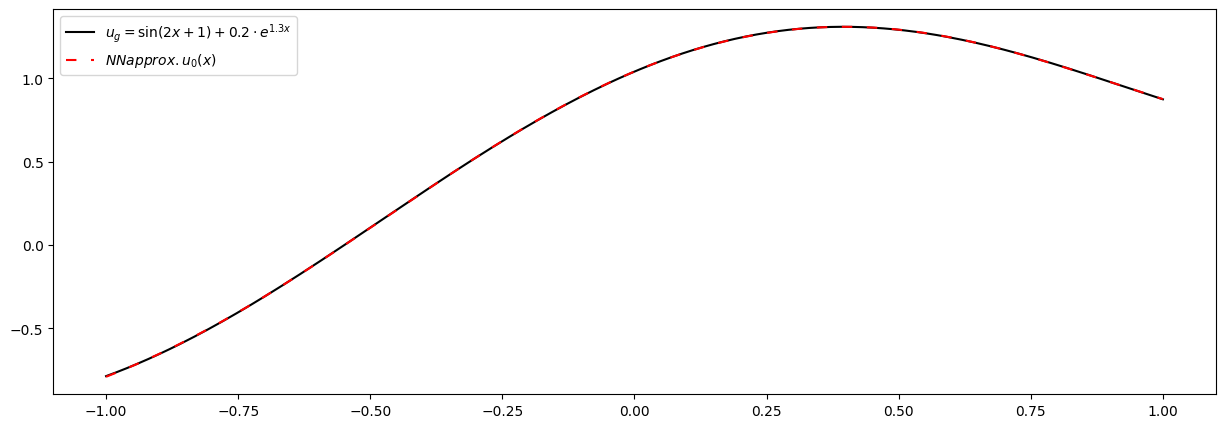

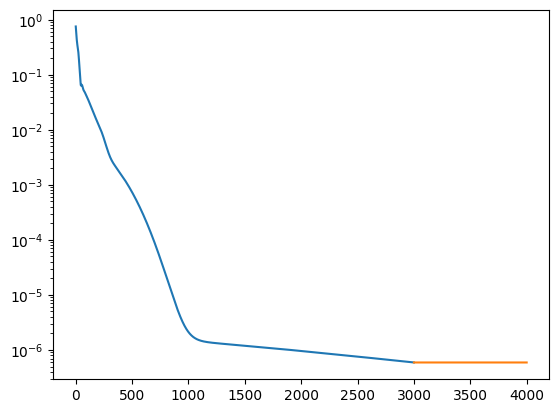

In [80]:
plt.figure(figsize=(15, 5))
plt.plot(x_np, u_true(x_np), label=r'$u_g = \sin(2x + 1) + 0.2\cdot e^{1.3x}$', color='black')
plt.plot(x_np, u_pred.detach().numpy(), label=r'$NN approx. u_0(x)$', linestyle='--', color='red', dashes=(5, 7))
plt.legend()
plt.show()

plt.plot(np.linspace(0, n_iter_adam, n_iter_adam), train_loss[:n_iter_adam])
plt.plot(np.linspace(n_iter_adam, n_iter_adam+n_iter_lbfgs, n_iter_lbfgs+1), train_loss[n_iter_adam-1:])
plt.yscale('log')
plt.show()